<p align="center" style="background-color: white;">
  <img src="https://www.groupe-gema.com/wp-content/uploads/2023/06/logo__gema.svg" alt="GEMA" style="width: 600px; height: auto;">
</p>

<div style="background-color: #3F579F; color: white; padding: 10px;" id="1">
<h1> <center> B2 - Introduction au traitement de l'image </center> </h1>
<h1> <center> Devoir 1 </center> </h1>
</div>

<h5><center> Mars 2025 </center></h5>
<h5><center> C. Sureda G. </center></h5>

<div style="background-color: white; padding: 10px; border-radius: 5px; color: black">
    
**Sauf mention contraire, voux pouvez utiliser l'image de votre choix pour répondre aux exercices.**
    
**Sauf mention contraire, vous devez utiliser Numpy pour la manipulation des images, sans passer par les méthodes directes de Pillow.**
    
**Commentez un maximum votre code.**
</div>

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
Questions de cours :
</div>

1. Quelle est la différence entre l'échantillonnage et la quantification des images numériques ?
2. Comment le système de couleur YCMK diffère-t-il du modèle RGB et dans quelles applications est-il généralement utilisé ?
3. Citez une technique pour améliorer le contraste d'une image.
4. Qu'est-ce qu'un histogramme d'une image et quelles informations peut-il fournir sur cette dernière ?
5. Lorsque l’on décale horizontalement un histogramme, est-ce le contraste ou la luminance qui sera modifié ?
6. D'après ce qui a été vu en cours, expliquez comment traiter les bords d'une image lors d'une opération de convolution.
7. Nous avons utilisé des histogrammes à plusieurs reprises dans le cours. Citez et expliquez ces différentes utilisations.

Reponses
1. Différence entre l'échantillonnage et la quantification des images numériques.
Échantillonnage :
L'échantillonnage consiste à prélever des échantillons de l'image à intervalles réguliers pour la convertir en une grille discrète de pixels. Cela détermine la résolution spatiale de l'image (nombre de pixels par unité de longueur).

Quantification :
La quantification consiste à attribuer une valeur numérique discrète à chaque échantillon prélevé. Cela détermine la précision des couleurs ou des niveaux de gris (nombre de bits par pixel).
Exemple : Une image en niveaux de gris quantifiée sur 8 bits aura 256 niveaux de gris possibles.
2. Différence entre le système de couleur CMYK et le modèle RGB
RGB (Rouge, Vert, Bleu) :

Modèle additif utilisé pour les écrans (moniteurs, télévisions, etc.).

Les couleurs sont créées en combinant différentes intensités de rouge, vert et bleu.

Applications : Affichage numérique, photographie numérique, jeux vidéo.

CMYK (Cyan, Magenta, Jaune, Noir) :

Modèle soustractif utilisé pour l'impression.

Les couleurs sont créées en soustrayant des pourcentages de cyan, magenta, jaune et noir de la lumière blanche.

Applications : Impression offset, imprimantes, conception graphique pour supports imprimés.

3. Technique pour améliorer le contraste d'une image
Étirement d'histogramme (Histogram Stretching) :
Cette technique redistribue les valeurs de pixels pour utiliser toute la plage dynamique disponible (par exemple, de 0 à 255 pour une image 8 bits). Cela augmente le contraste en étirant les valeurs sombres et claires.

4. Histogramme d'une image et informations fournies
Un histogramme est un graphique qui représente la distribution des intensités des pixels dans une image.

Informations fournies :

Luminance globale : Si l'histogramme est décalé vers la gauche, l'image est sombre ; s'il est décalé vers la droite, elle est claire.

Contraste : Un histogramme étroit indique un faible contraste, tandis qu'un histogramme large indique un contraste élevé.

Détails : Les pics et les creux peuvent révéler des zones sur ou sous-exposées.

5. Décalage horizontal d'un histogramme : contraste ou luminance ?
Lorsque l'on décale horizontalement un histogramme, c'est la luminance (ou la luminosité globale) de l'image qui est modifiée.

Le contraste reste inchangé, car la répartition relative des intensités des pixels n'est pas altérée.

6. Traitement des bords d'une image lors d'une convolution
Lors d'une convolution, les bords de l'image posent problème car le noyau (kernel) dépasse de l'image. Plusieurs techniques sont utilisées :

Remplissage par zéros (Zero-padding) : Ajouter des pixels de valeur 0 autour de l'image.

Réplication des bords : Répéter les valeurs des pixels des bords pour remplir les zones manquantes.

Enroulement (Wrap-around) : Utiliser les pixels de l'autre côté de l'image (comme si l'image était périodique).

Ignorer les bords : Ne pas traiter les pixels des bords où le noyau ne peut pas s'appliquer entièrement.

7. Utilisations des histogrammes dans le cours
Analyse de l'image :
Comprendre la distribution des intensités des pixels (luminance, contraste).

Étirement d'histogramme :
Améliorer le contraste en redistribuant les valeurs des pixels.

Égalisation d'histogramme :
Répartir uniformément les intensités pour améliorer le contraste global.

Seuillage (Thresholding) :
Utiliser l'histogramme pour déterminer des seuils de binarisation.

Correction gamma :
Ajuster la luminance en fonction de la courbe de l'histogramme.





<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
1. Écrire un code qui affiche une nouvelle image correspondante à l'image de départ quatre fois plus petite.
</div>

In [8]:
# juste avant de commencer, j'installe et j'importe les bibliotheque necessaires.
#Import de librairies nécessaires pour ce chapitre

from PIL import Image        # Permet de charger, traiter et sauvegarder plusieurs formats d'images différents.
from PIL import ImageOps     # Fournit des opérations de traitement d'image telles que le recadrage, le retournement, ou la rotation.
from PIL import ImageEnhance # Offre des fonctions pour ajuster les propriétés des images, telles que la couleur, le contraste, la luminosité et la netteté.

# NumPy est une bibliothèque pour le calcul scientifique en Python.
import numpy as np           # Elle est largement utilisée pour la manipulation de grands tableaux et matrices multidimensionnelles, comme une image.

# Tkinter est la bibliothèque standard de Python pour la création d'interfaces graphiques utilisateur (GUI).
import tkinter as tk         # Elle va être utilisée pour avoir des informations sur l'écran de notre ordinateur.

In [9]:
# affichons une image 4 fois plus petite que l'image de depart.


# Charger l'image de départ
image = Image.open("chat-lion.jpg")  

#  dimensions de l'image d'origine
largeur, hauteur = image.size
print(f"Dimensions d'origine : {largeur}x{hauteur}")

#  nouvelles dimensions (diviser par 2 en largeur et en hauteur)
nouvelle_largeur = largeur // 2
nouvelle_hauteur = hauteur // 2
print(f"Nouvelles dimensions : {nouvelle_largeur}x{nouvelle_hauteur}")

# Redimension de l'image en utilisant la méthode resize
image_reduite = image.resize((nouvelle_largeur, nouvelle_hauteur))

# Afficher l'image réduite
image_reduite.show()

# Sauvegarder l'image réduite (optionnel)
image_reduite.save("chat-lion-reduit.jpg")
print("Image réduite sauvegardée sous 'image_reduite.jpg'")


Dimensions d'origine : 372x394
Nouvelles dimensions : 186x197
Image réduite sauvegardée sous 'image_reduite.jpg'


<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
2. Écrire un code qui affiche l'image symétrique (voir exemple ci-dessous). Astuce: vous pouvez vous servir du "pas" dans un array Numpy
</div>

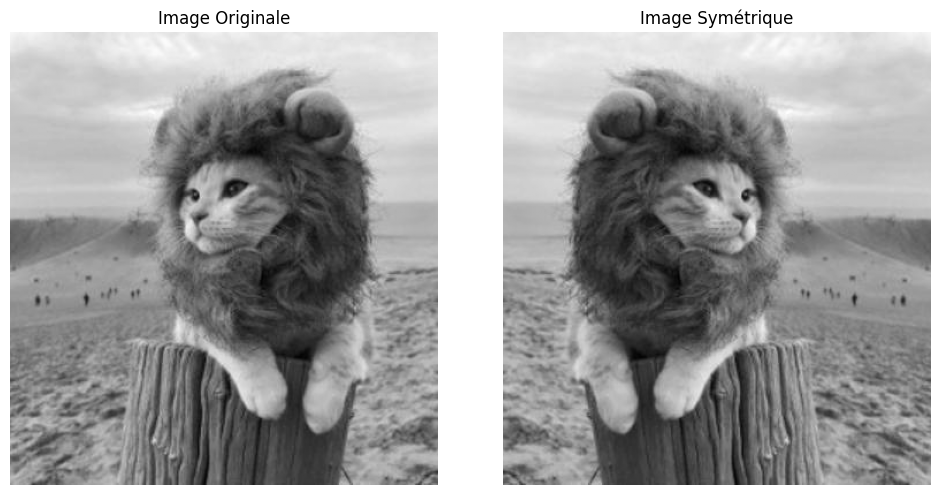

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Charger l'image en niveaux de gris
image_path = 'chat-lion.jpg'
image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris

# Création de l'image symétrique
image_array = np.array(image)
symmetric_image_array = image_array[:, ::-1]  # Inverser horizontalement
symmetric_image = Image.fromarray(symmetric_image_array)

# Affichage des résultats
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Image Originale")
axes[0].axis("off")

axes[1].imshow(symmetric_image, cmap='gray')
axes[1].set_title("Image Symétrique")
axes[1].axis("off")

plt.tight_layout()
plt.show()

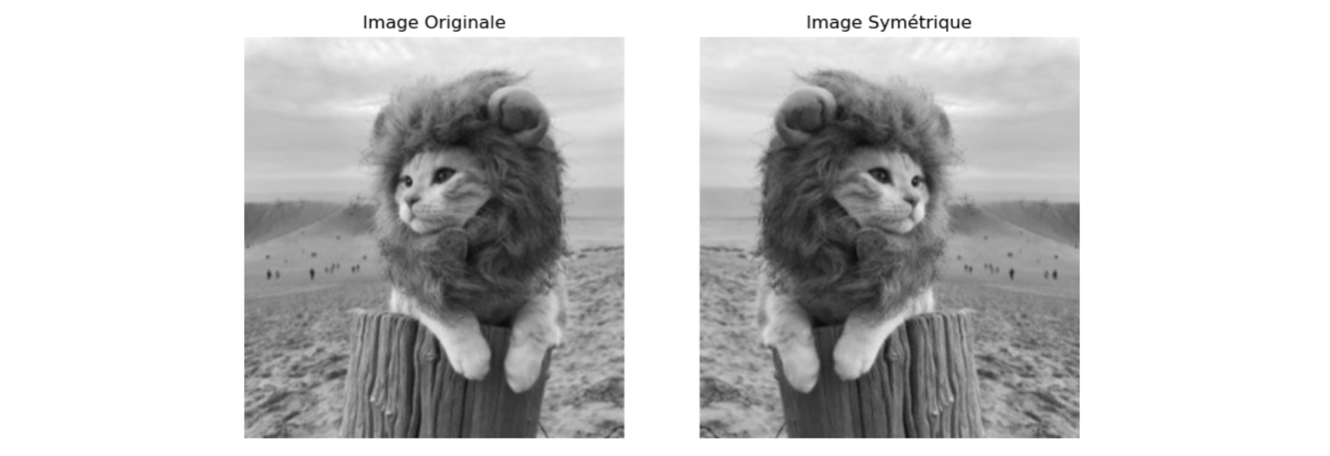

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
3. En utilisant Pillow, créer un code qui affiche une image correspondante à la même image tournée de 30° et superposée à la même image tournée de -30° (voir exemple ci-dessous).
</div>

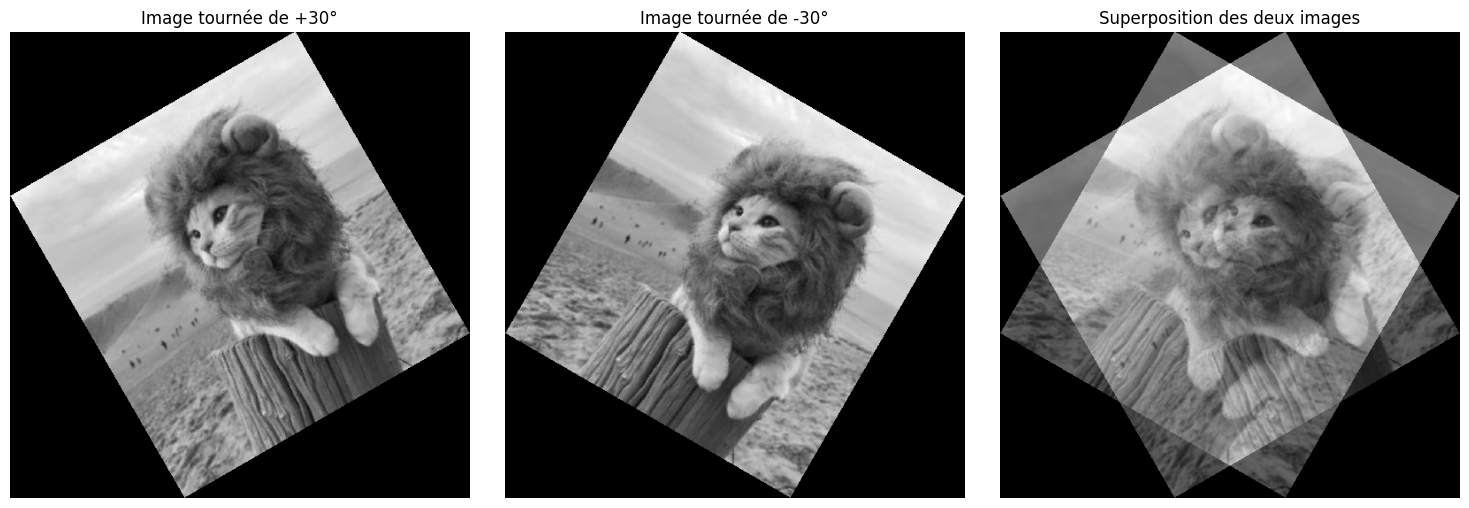

In [11]:
# Charger l'image en niveaux de gris
image_path = 'chat-lion.jpg'
image = Image.open(image_path).convert('L')  # Convertir en niveaux de gris

# Rotation de l'image
image_rotated_pos = image.rotate(30, expand=True)  # Rotation de +30°
image_rotated_neg = image.rotate(-30, expand=True)  # Rotation de -30°

# Fusion des images en superposition
blended_image = Image.blend(image_rotated_pos, image_rotated_neg, alpha=0.5)

# Affichage des résultats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_rotated_pos, cmap='gray')
axes[0].set_title("Image tournée de +30°")
axes[0].axis("off")

axes[1].imshow(image_rotated_neg, cmap='gray')
axes[1].set_title("Image tournée de -30°")
axes[1].axis("off")

axes[2].imshow(blended_image, cmap='gray')
axes[2].set_title("Superposition des deux images")
axes[2].axis("off")

plt.tight_layout()
plt.show()

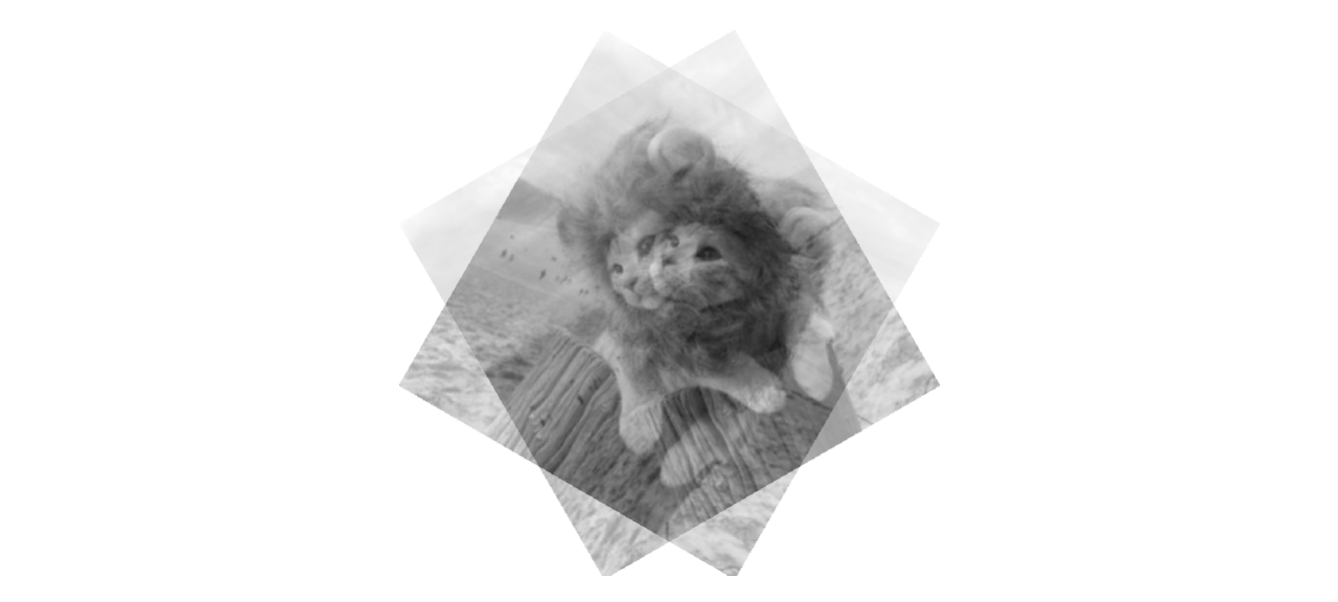

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
4. Afficher l'histogramme de l'image "cellules.jpg". En vous appuyant sur le résultat, commentez les caractéristiques de l'image.
</div>

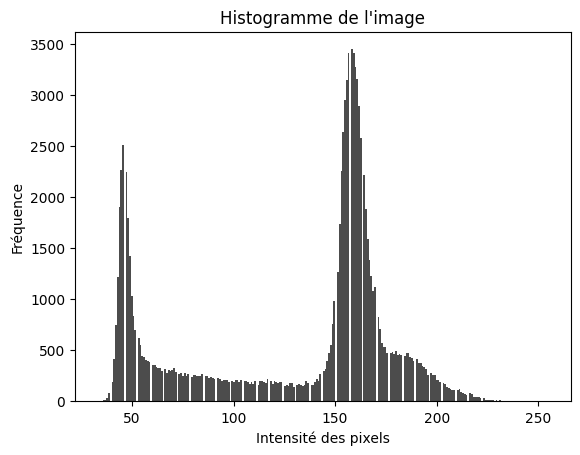

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image avec PIL
image = Image.open('cellules.jpg').convert('L')  # Convertir l'image en niveaux de gris

# Convertir l'image en un tableau numpy
image_array = np.array(image)

# Afficher l'histogramme
plt.hist(image_array.ravel(), bins=256, color='black', alpha=0.7)
plt.title('Histogramme de l\'image')
plt.xlabel('Intensité des pixels')
plt.ylabel('Fréquence')
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
5. Proposer un code qui transforme en blanc les intensités des pixels au dessus d'un certain seuil.
</div>

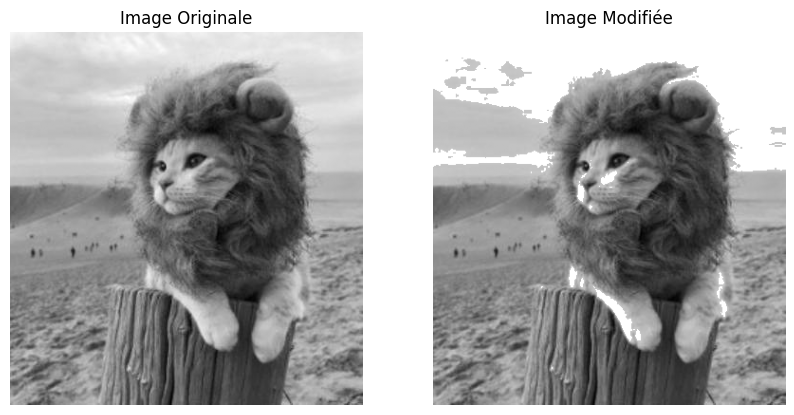

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris avec PIL
image = Image.open('chat-lion.jpg').convert('L')  # Convertir en niveaux de gris

# Convertir l'image en un tableau numpy
image_array = np.array(image)

# Définir un seuil
seuil = 200

# Transformer en blanc les pixels au-dessus du seuil
image_array[image_array > seuil] = 255

# Convertir le tableau numpy modifié de retour en image
image_modified = Image.fromarray(image_array)

# Affichage côte à côte avec matplotlib
plt.figure(figsize=(10, 5))

# Affichage de l'image originale
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

# Affichage de l'image modifiée
plt.subplot(1, 2, 2)
plt.imshow(image_modified, cmap='gray')
plt.title('Image Modifiée')
plt.axis('off')

# Afficher le résultat
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
6. Faites les traitements nécessaires pour obtenir l'image de droite à partir de l'image de gauche
</div>

![Screenshot 2025-03-13 at 09.59.48.png](<attachment:Screenshot 2025-03-13 at 09.59.48.png>)
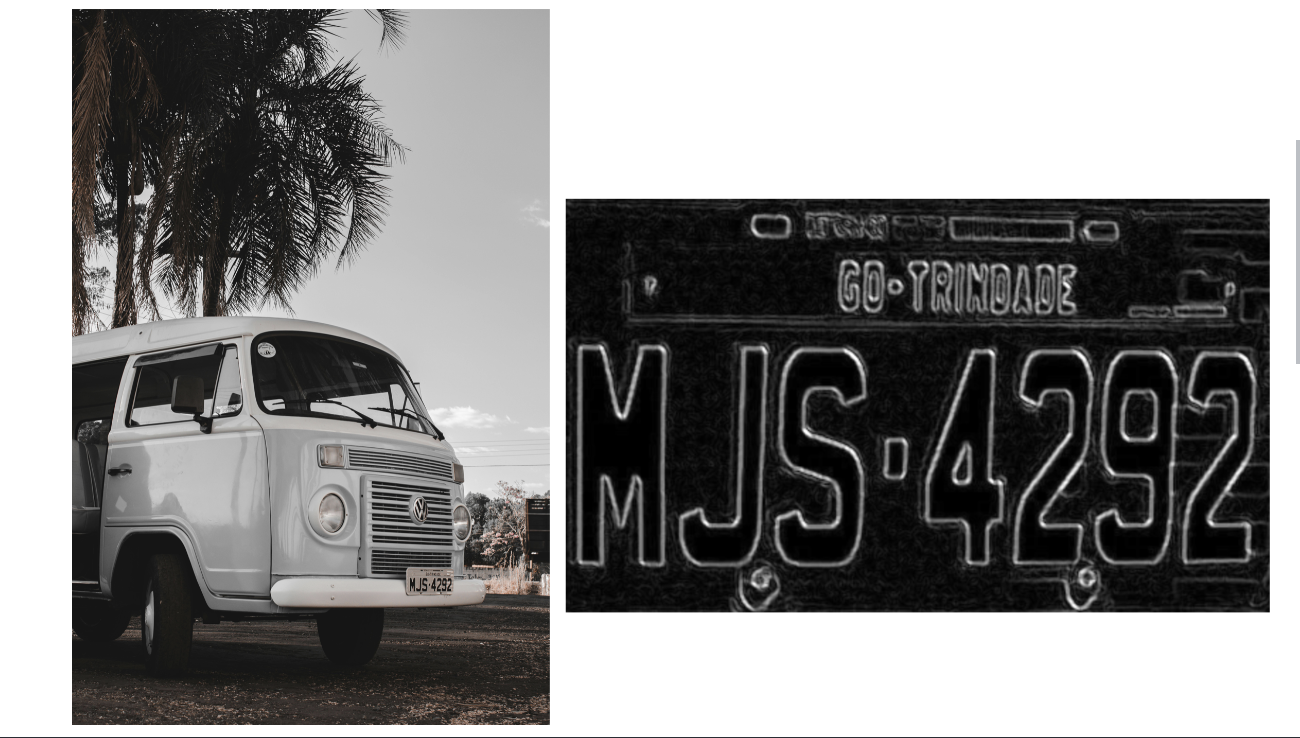

comme je narrive pas a bien couper mon image je vais aller dans mon ordinateur couper manuellement et enregistrer l'image coupé en tant que nouvel image dans mon repertoire.

j'ai donc une image nouvelle qui est van(1)(1)

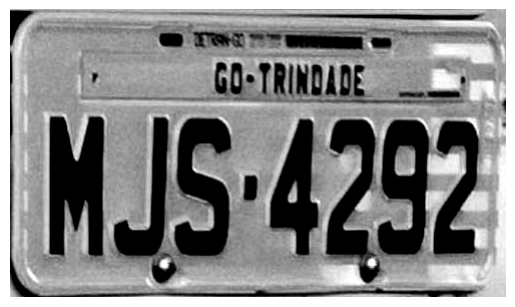

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Charger l'image avec PIL
image = Image.open('van(1)(1).png')

# Convertir l'image en un tableau numpy
image_array = np.array(image)

# Convertir l'image en niveaux de gris si elle est en couleur
if len(image_array.shape) == 3:  # Si l'image est en couleur (RGB)
    gray_image = np.dot(image_array[...,:3], [0.2989, 0.5870, 0.1140])  # Conversion en niveau de gris
else:
    gray_image = image_array

# Appliquer une transformation linéaire pour augmenter le contraste
alpha = 2.0  # Facteur de contraste, plus grand que 1 augmente le contraste
new_image_array = alpha * (gray_image - 128) + 128

# Limiter les valeurs des pixels entre 0 et 255
new_image_array = np.clip(new_image_array, 0, 255)

# Afficher l'image avec matplotlib
plt.imshow(new_image_array, cmap='gray')
plt.axis('off')  # Enlever les axes
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
7. Écrire un code qui:

- Divise une image RGB en 3 canaux différents.
- Pour chaque canal, mets à 0 les deux autres.
- Affiche les trois images correspondantes ainsi créées.
</div>

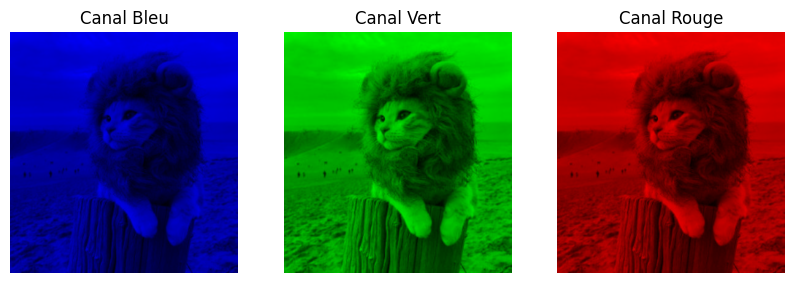

In [11]:
# Charger l'image en couleur avec PIL
image = Image.open('chat-lion.jpg')

# Vérifier si l'image est en mode RGB
if image.mode != 'RGB':
    image = image.convert('RGB')

# Convertir l'image en tableau numpy
image_array = np.array(image)

# Diviser l'image en 3 canaux (R, G, B)
red, green, blue = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]

# Créer les images en mettant à 0 les deux autres canaux
image_red = np.zeros_like(image_array)
image_red[:,:,0] = red  # Garder uniquement le canal rouge

image_green = np.zeros_like(image_array)
image_green[:,:,1] = green  # Garder uniquement le canal vert

image_blue = np.zeros_like(image_array)
image_blue[:,:,2] = blue  # Garder uniquement le canal bleu

# Afficher les 3 images
plt.figure(figsize=(10, 10))

# Afficher l'image avec uniquement le canal bleu
plt.subplot(1, 3, 1)
plt.imshow(image_blue)
plt.title('Canal Bleu')
plt.axis('off')

# Afficher l'image avec uniquement le canal vert
plt.subplot(1, 3, 2)
plt.imshow(image_green)
plt.title('Canal Vert')
plt.axis('off')

# Afficher l'image avec uniquement le canal rouge
plt.subplot(1, 3, 3)
plt.imshow(image_red)
plt.title('Canal Rouge')
plt.axis('off')

# Afficher le résultat
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
8. Proposer un code permettant de fabriquer le drapeau français dans une image 400 par 400.
</div>

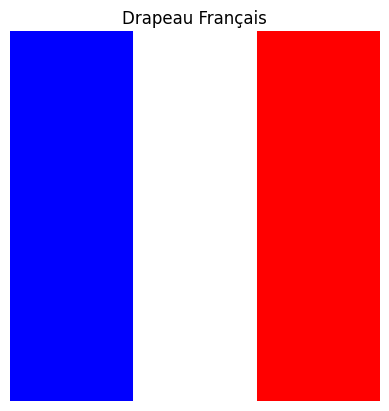

In [15]:
# Créer une image de taille 400x400
image = np.zeros((400, 400, 3), dtype=np.uint8)

# Remplir les trois bandes de couleur : bleu, blanc, rouge (format RGB)
image[:, :133] = [0, 0, 255]  # Bleu
image[:, 133:267] = [255, 255, 255]  # Blanc
image[:, 267:] = [255, 0, 0]  # Rouge

# Afficher l'image du drapeau français
plt.imshow(image)
plt.title('Drapeau Français')
plt.axis('off')
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
9. Proposer un code pour fusionner les images "raccoon.png" et "chat-lion.jpg" sans les redimmensioner, de sorte à que "chat-lion.jpg" se retrouve au centre de "raccon.png" (voir exemple ci-dessous).

Astuce: vous pouvez utiliser la méthode "paste" de Pillow.
</div>

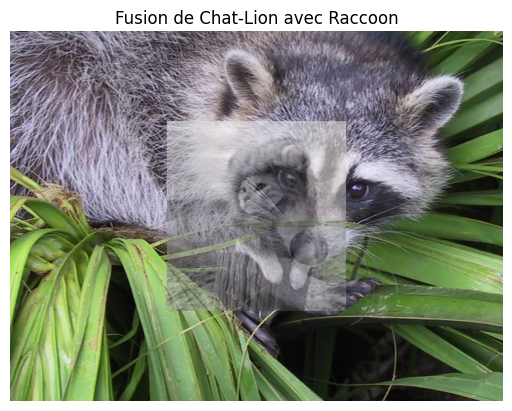

In [ ]:
# Charger les deux images
image_raccoon = Image.open('raccoon.png')
image_chat_lion = Image.open('chat-lion.jpg')

# Obtenir les dimensions des images
raccoon_width, raccoon_height = image_raccoon.size
chat_lion_width, chat_lion_height = image_chat_lion.size

# Calculer les coordonnées pour placer "chat-lion.jpg" au centre de "raccoon.png"
left = (raccoon_width - chat_lion_width) // 2
top = (raccoon_height - chat_lion_height) // 2

# Convertir les images en mode RGBA (avec canal alpha)
image_raccoon = image_raccoon.convert("RGBA")
image_chat_lion = image_chat_lion.convert("RGBA")

# Créer un masque alpha pour ajuster l'intensité de l'apparition de chat-lion
alpha = 0.6  # Chat-lion sera moins visible (valeur entre 0 et 1)

# Créer une nouvelle image fusionnée (background raccoon)
image_fusionnee = image_raccoon.copy()

# Appliquer le blending (fusion) de chat-lion avec le fond raccoon
for y in range(chat_lion_height):
    for x in range(chat_lion_width):
        if 0 <= top + y < raccoon_height and 0 <= left + x < raccoon_width:
            # Obtenir les pixels de "raccoon.png" et "chat-lion.jpg"
            raccoon_pixel = image_raccoon.getpixel((left + x, top + y))
            chat_lion_pixel = image_chat_lion.getpixel((x, y))
            
            # Appliquer le blending avec l'alpha
            blended_pixel = tuple(
                int((1 - alpha) * raccoon_pixel[i] + alpha * chat_lion_pixel[i]) for i in range(3)
            )
            
            # Placer le pixel fusionné dans l'image finale
            image_fusionnee.putpixel((left + x, top + y), blended_pixel)

# Afficher l'image fusionnée
plt.imshow(image_fusionnee)
plt.title('Fusion de Chat-Lion avec Raccoon')
plt.axis('off')  # Ne pas afficher les axes
plt.show()

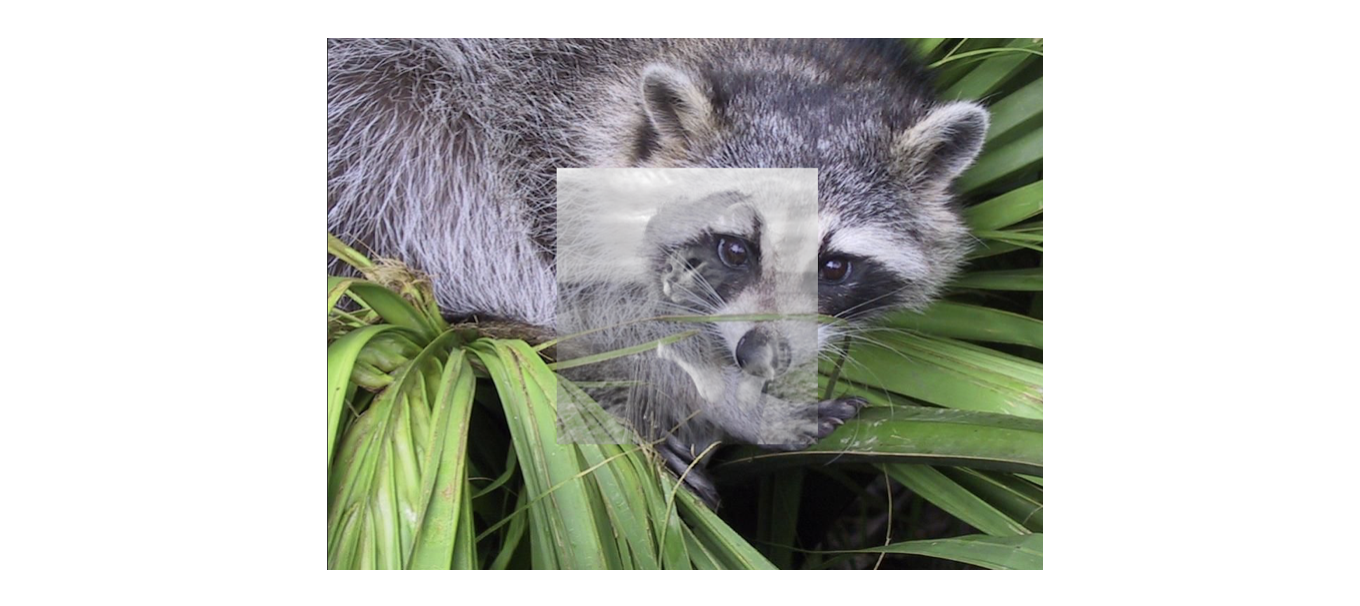

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
10. Ecrire un code qui permette de créer une image en dégradé de rouge (horizontal ou vertical, à votre choix). (Astuce : il est plus simple de choisir une image de taille 256 × 256).
</div>

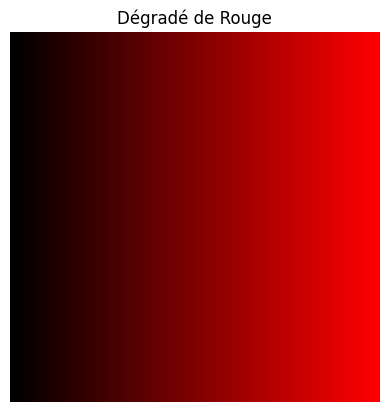

In [17]:
# Créer une image de taille 256x256
image = np.zeros((256, 256, 3), dtype=np.uint8)

# Créer un dégradé horizontal de rouge (modifier la composante rouge, qui est le canal 0)
for i in range(256):
    image[:, i, 0] = i  # Modifier la composante rouge en fonction de la position

# Afficher l'image
plt.imshow(image)
plt.title('Dégradé de Rouge')
plt.axis('off')
plt.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
11. Carré multicouleur

Pour cette partie, vous allez utiliser l’image « raccoon.png »

1. Écrire un code qui charge une image et l’enregistre dans un tableau de nombre à 3 dimensions, puis créer trois tableaux contenants chacun une des trois composantes de couleur de l’image (rouge, vert et bleu).

2. Afficher l’image de départ et les trois images selon les trois composantes de couleur dans la même figure, comme expliqué et montré dans l’exemple ci-dessous.

3. Voici le détail de chaque carré : le quart supérieur gauche du haut effacera la composante rouge, le quart supérieur droit du haut effacera la  composante verte, le quart inférieur gauche effacera la composante bleue, et le quart inférieur droit de l’image restera intact.

Pour afficher plusieurs images dans une même figure, on peut utiliser la fonction subplot du module pyplot : plt.subplot(n,p,k)
</div>

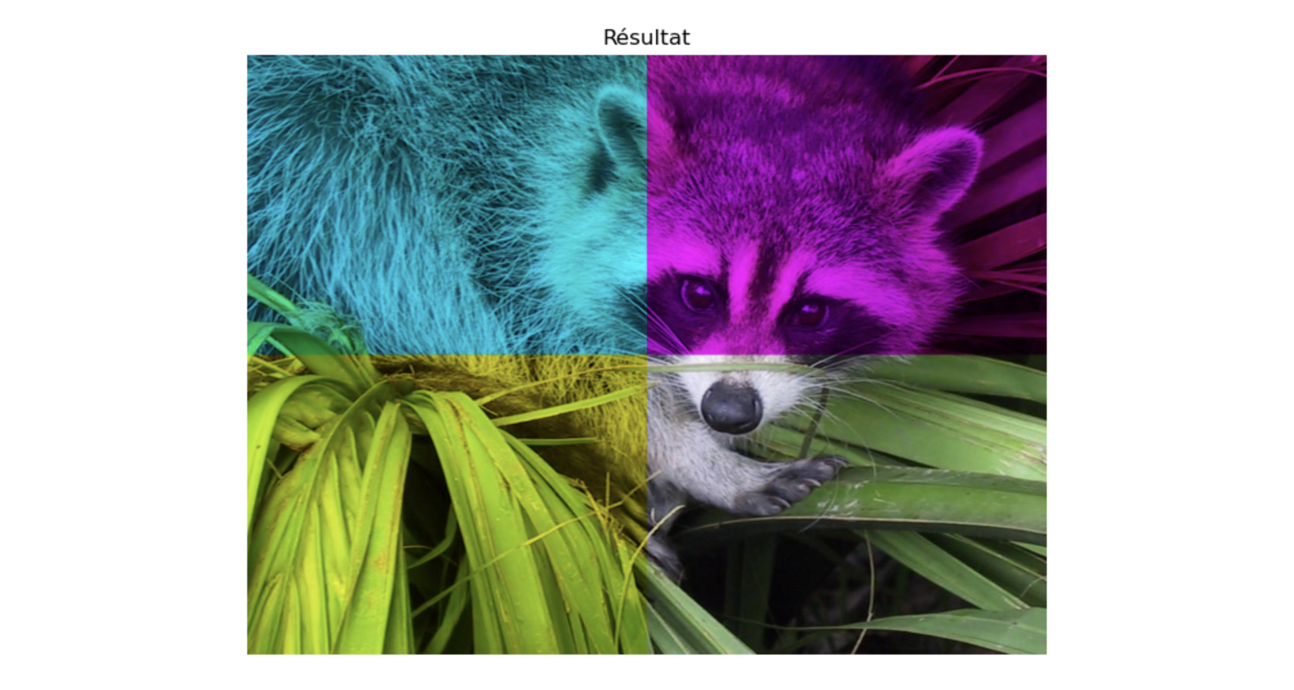

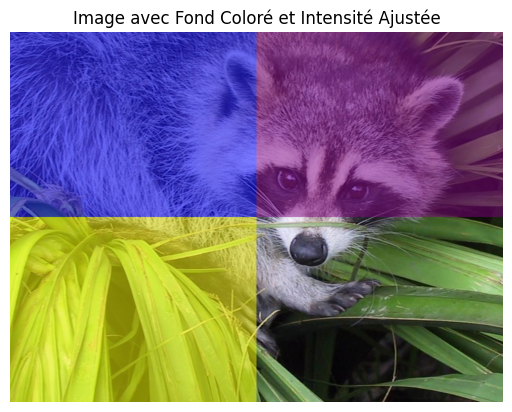

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image "raccoon.png"
image = Image.open('raccoon.png')

# Convertir l'image en tableau NumPy (3 dimensions)
image_array = np.array(image)

# Obtenir les dimensions de l'image
height, width, _ = image_array.shape

# Définir les couleurs de fond pour chaque partie
blue = np.array([0, 0, 255], dtype=np.uint8)   # Bleu
violet = np.array([128, 0, 128], dtype=np.uint8)  # Violet
yellow = np.array([255, 255, 0], dtype=np.uint8)  # Jaune

# Créer un fond transparent (initialement vide)
background = np.array(image)  # Créer une copie de l'image d'origine

# Définir un facteur d'intensité pour les couleurs de fond
alpha = 0.5  # Valeur entre 0 (transparent) et 1 (pleinement visible)

# Appliquer les couleurs de fond aux parties spécifiques de l'image avec intensité
# Partie 1 (quart supérieur gauche) -> bleu
background[:height//2, :width//2] = (1 - alpha) * image_array[:height//2, :width//2] + alpha * blue

# Partie 2 (quart supérieur droit) -> violet
background[:height//2, width//2:] = (1 - alpha) * image_array[:height//2, width//2:] + alpha * violet

# Partie 3 (quart inférieur gauche) -> jaune
background[height//2:, :width//2] = (1 - alpha) * image_array[height//2:, :width//2] + alpha * yellow

# Partie 4 (quart inférieur droit) -> garder l'image d'origine
# Aucune modification n'est effectuée pour cette partie

# Afficher l'image fusionnée
plt.imshow(background)
plt.title('Image avec Fond Coloré et Intensité Ajustée')
plt.axis('off')  # Ne pas afficher les axes
plt.show()